In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

# Point Processing Experiments

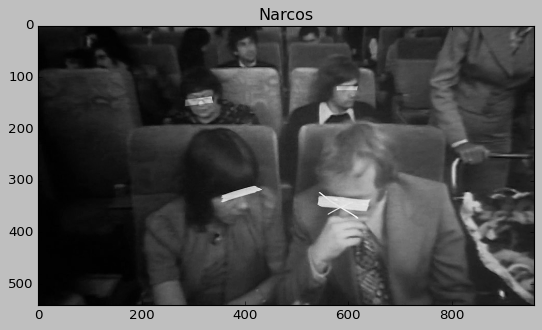

In [2]:
def image_reader(path):
    return cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2GRAY)

def display_image(img,name):
    plt.imshow(img,cmap='gray')
    plt.title(name)
    plt.show()

path = "narcos.jpg"
image = image_reader(path)    
display_image(image,"Narcos")

It is to be noted that the numpy array now created is like a circular queue, if the value goes above 255, It is swtiched to 0 and then incremented correspondingly, and vice-versa if brought down below 0. So what we do is we create it the condition such a way that whole Array is taken care that no value exceed the threshold before operating.</br>

### Brightness Adjustment

In [3]:
def brightness_adjust(img,level):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = int(img[i][j]+level)
            if x<=255 and x>=0:
                img[i][j] = x
            elif x>255:
                img[i][j]=255
            else:
                img[i][j]=0
    return img

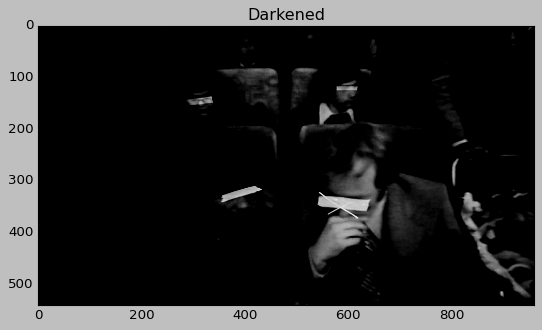

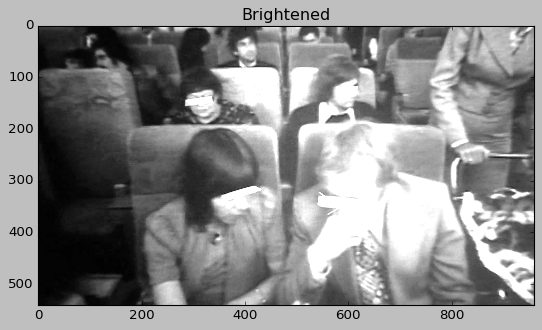

In [4]:
display_image(brightness_adjust(image.copy(),-100),"Darkened")
display_image(brightness_adjust(image.copy(),150),"Brightened")

### Contrast Adjustment

Formula is given by $$f'(x,y) =\frac{f(x,y)-f_{min}}{f_{max}-f_{min}}\cdot 255$$ <br><br>
Now we know that, It is usually easy to comprehend contrast in terms of PERCENTAGES. <br>So, we take expected percentage of contrast from the user and try to calculate equivalent values of $f_{max}$ and $f_{min}$ and once again run the same algorithm of processing it.

In [5]:
def contrast_equilization(img,fmin,fmax):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = int((img[i][j]-fmin)*255/(fmax-fmin))
            if x<=255 and x>=0:
                img[i][j] = x
            elif x>255:
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def contrast_adjustment(img,percent):
    return contrast_equilization(img, int(127-((100-percent)*127/200)),int(127+((100-percent)*127/200)))

### Classroom July,10

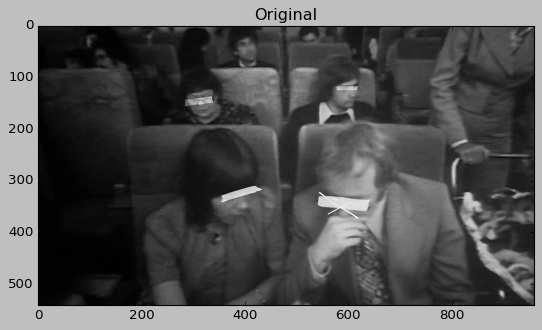

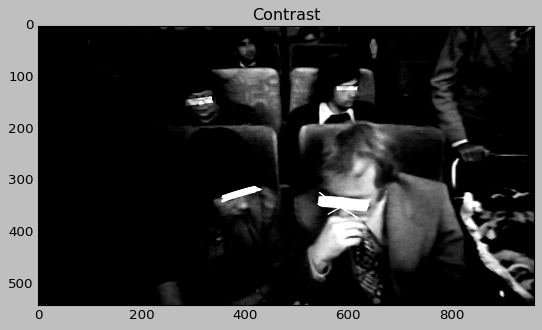

In [6]:
display_image(image,"Original")
display_image(contrast_adjustment(image.copy(),10),"Contrast")

In [7]:
def histplot(image,cmformat):
    n =0;
    if cmformat=="Reds":
        n=0
    elif cmformat=="Blues":
        n=2
    else:
        n=1
    plt.subplot(2,1,1)
    plt.hist(image[:,:,n],bins=[0,50,100,150,200,250])
    plt.title("Histogram")
    plt.subplot(2,1,2)
    plt.imshow(image,cmap=cmformat)
    plt.title("Image")
    plt.show()

In [8]:
narcos = cv2.imread("narcos.jpg")
narcos = cv2.cvtColor(narcos,cv2.COLOR_BGR2RGB)
r_narcos,b_narcos,g_narcos = narcos.copy(),narcos.copy(),narcos.copy()
r_narcos[:,:,1] = 0
r_narcos[:,:,2] = 0
g_narcos[:,:,0] = 0
g_narcos[:,:,2] = 0
b_narcos[:,:,1] = 0
b_narcos[:,:,0] = 0

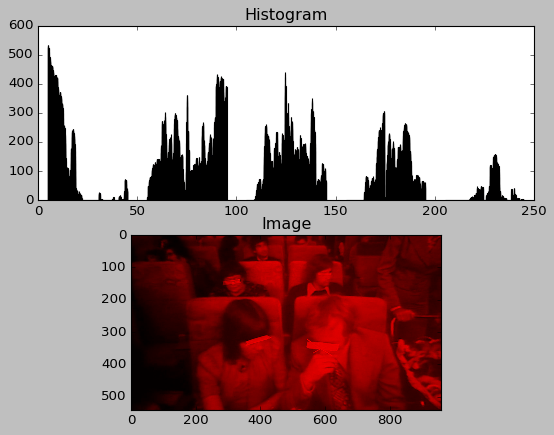

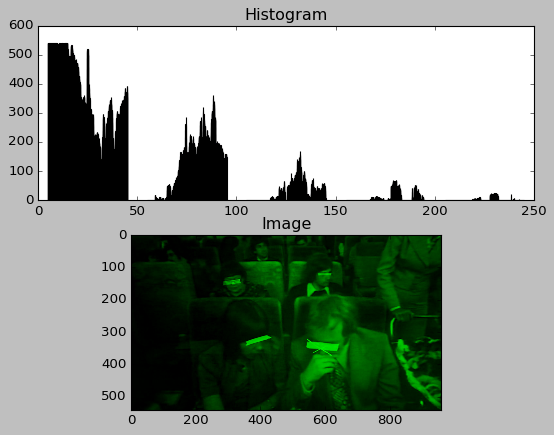

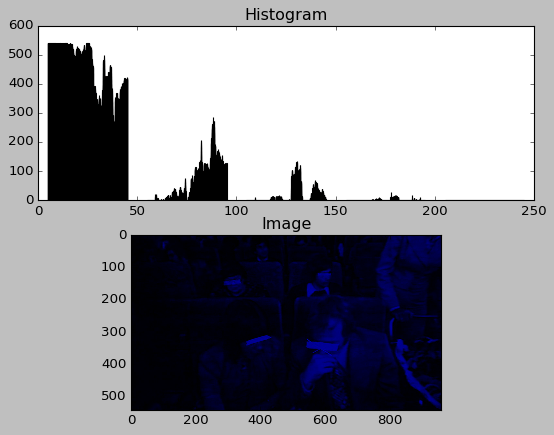

In [9]:
histplot(r_narcos,"Reds")
histplot(g_narcos,"Greens")
histplot(b_narcos,"Blues")

In [10]:
def log_adjust(img,c):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = c * np.log(img[i][j])
            if x<=255 and x>=0:
                img[i][j] = x
            elif x>255:
                img[i][j]=255
            else:
                img[i][j]=0
    return img

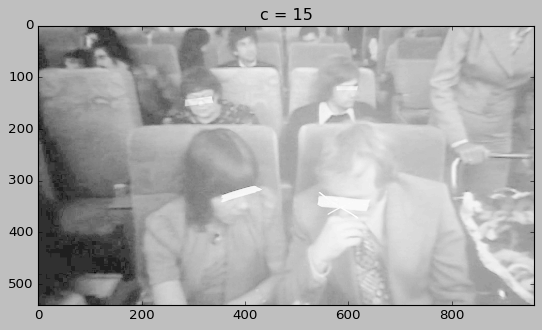

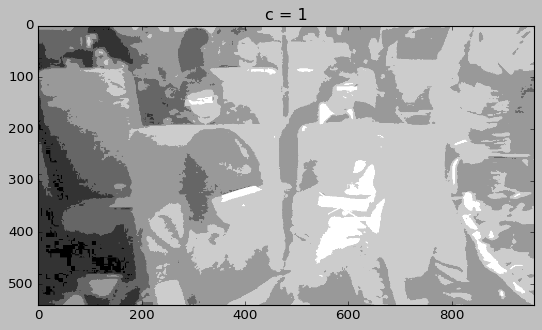

In [11]:
plt.imshow(log_adjust(image.copy(),15),cmap='gray')
plt.title("c = 15")
plt.show()
plt.imshow(log_adjust(image.copy(),1),cmap='gray')
plt.title("c = 1")
plt.show()